In [1]:
# imports
import os
import sys

import paths
import functions_bondjango as bd
import functions_misc as fm
import functions_plotting as fp
import pandas as pd
import numpy as np
import sklearn.mixture as mix
import sklearn.decomposition as decomp
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import svm, datasets
from sklearn import preprocessing
import sklearn.linear_model as lin
import sklearn.metrics as smet
import scipy.signal as ss

import random
import functions_data_handling as fd
import importlib
import processing_parameters
import h5py
import pathlib

In [37]:
%matplotlib inline 
import matplotlib.pyplot as plt

# Correlate .doric loaded into numpy vs .tif loaded directly.

In [ ]:
tif_file = r'D:\05_02_2022_13_40_25_VWheel_MM_220121_a_fixed0_gabor_mini.tif'
doric_file = r'D:\05_02_2022_13_40_25_VWheel_MM_220121_a_fixed0_gabor_mini.doric'

In [ ]:
import functions_doric as fdor
import tifffile

In [ ]:
# load doric file
doric_data = fdor.extract_doric(doric_file)
doric_data = doric_data[0]['Data'][0]['Data']
# permute to leave frames as the first dimension
doric_data = np.transpose(doric_data, [2, 0, 1])

In [ ]:
# load doric file
tif_data = tifffile.imread(tif_file)

In [ ]:
print(tif_data.shape)
print(doric_data.shape)

In [ ]:
# check if arrays contain the same values
print(np.array_equal(doric_data, tif_data))

In [ ]:
plt.imshow(np.corrcoef(doric_data[0, :], tif_data[0, :]))

In [ ]:
from skimage.feature import match_template, register_translation

In [ ]:
shift, error, diffphase = register_translation(doric_data, tif_data, 1)

In [ ]:

image_product = np.fft.fft2(doric_data[5000,:]) * np.fft.fft2(tif_data[5000,:]).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
plt.imshow(cc_image.real)

In [ ]:
[np.corrcoef(doric_data[:, 0, 0], tif_data[:, 0, 0]) for i in doric_data.shape[0]] 

In [ ]:
corr = ss.correlate(doric_data[:, 0, 0], tif_data[:, 0, 0])
lags = ss.correlation_lags(len(doric_data[:, 0, 0]), len(tif_data[:, 0, 0]))
corr = corr / np.max(corr)

In [ ]:
plt.plot(lags, corr)

In [ ]:
plt.imshow(doric_data[0, :])

In [ ]:
plt.imshow(tif_data[0, :])

In [ ]:
corr = ss.correlate2d(doric_data[0, :], 
                      tif_data[0, :],
                      boundary='symm',
                      mode='full')

# Check distributions of values between files acquired as tif and those converted from .doric

In [33]:
def get_ca_data_from_h5(path):
    with h5py.File(path, 'r') as f:
        calcium = f[('C')][:]
        footprints = f[('A')][:]
        
    return calcium, footprints

In [34]:
old_ca_file = r'D:\04_12_2022_MM_220121_a_calciumday.hdf5'
new_ca_file = r'D:\05_03_2022_MM_220121_a_calciumday.hdf5'

In [35]:
old_ca, old_rois = get_ca_data_from_h5(old_ca_file)
new_ca, new_rois = get_ca_data_from_h5(new_ca_file)

(array([[68.,  0.,  0., ...,  0.,  0.,  0.],
        [68.,  0.,  0., ...,  0.,  0.,  0.],
        [68.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [60.,  6.,  2., ...,  0.,  0.,  0.],
        [60.,  6.,  2., ...,  0.,  0.,  0.],
        [60.,  7.,  1., ...,  0.,  0.,  0.]]),
 array([ 0.        ,  3.30972673,  6.61945345,  9.92918018, 13.23890691,
        16.54863363, 19.85836036, 23.16808709, 26.47781381, 29.78754054,
        33.09726727]),
 <a list of 12541 BarContainer objects>)

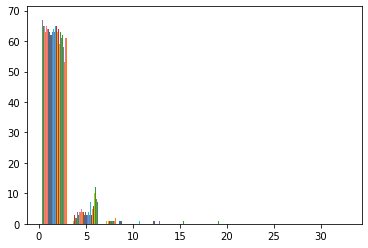

In [38]:
plt.hist(old_ca)
plt.show()

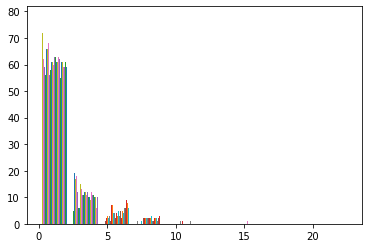

In [39]:
plt.hist(new_ca)
plt.show()

In [3]:
a = pd.read_hdf(r'D:\04_12_2022_13_58_22_VWheel_MM_220117_a_fixed0_gabor_dlc.h5')

In [9]:
a.columns.levels[-2]

Index(['LED', 'eyeCornerNasal', 'eyeCornerTemporal', 'eyelidBottom',
       'eyelidTop', 'pupilBottom', 'pupilBottomLeft', 'pupilBottomRight',
       'pupilCenter', 'pupilLeft', 'pupilRight', 'pupilTop', 'pupilTopLeft',
       'pupilTopRight'],
      dtype='object', name='bodyparts')